In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1)) #normalisation
X = sc.fit_transform(X)

In [6]:
from minisom import MiniSom

In [7]:
som = MiniSom(x=10, y=10, input_len = 15, sigma = 1.0 , learning_rate=0.5)

In [9]:
#training SOM 
som.random_weights_init(X)
som.train_random(data = X , num_iteration = 100)

In [10]:
#getting the results
from pylab import bone, pcolor, colorbar, plot, show

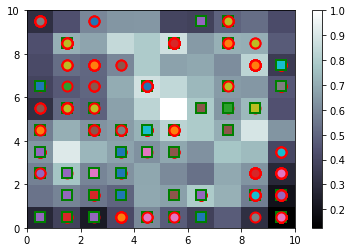

In [14]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]], markeredgecolor = colors[y[i]],markerfacecolor=None, markersize=10,markeredgewidth=2)
show()    

In [20]:
#Identifying frauds

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)],mappings[(6,0)]),axis = 0 )

In [21]:
frauds = sc.inverse_transform(frauds)

In [22]:
frauds

array([[1.5605791e+07, 1.0000000e+00, 1.9500000e+01, 9.5850000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 7.9000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+01, 3.5100000e+02],
       [1.5571415e+07, 1.0000000e+00, 3.7580000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00],
       [1.5565714e+07, 1.0000000e+00, 4.2750000e+01, 4.0850000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 1.0100000e+02],
       [1.5608688e+07, 1.0000000e+00, 1.5170000e+01, 7.0000000e+00,
        2.0000000e+00, 1.0000000e+01, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,